## 🔍 Step 1: Define the Problem ¶

Can we segment mall customers into distinct groups based on their **Annual Income** and **Spending Score**?  

This task is suitable for **unsupervised learning** because we **do not have labeled target groups**; instead, we aim to discover natural patterns and clusters among customers.


In [1]:
# Necessary libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


## 📂 Step 2: Load and Explore Data Analysis (EDA) ¶

We use the **Mall Customer dataset** from Kaggle with features such as customer demographics and spending behavior.

For this analysis, we select only the following columns:  
`[CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)]`

These variables will be used to **segment customers** into distinct clusters based on their **Annual Income** and **Spending Score**.


In [2]:
file_path = '/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv'
Data = pd.read_csv(file_path)

In [3]:
Data.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [4]:
data = Data[['Annual Income (k$)' , 'Spending Score (1-100)']]

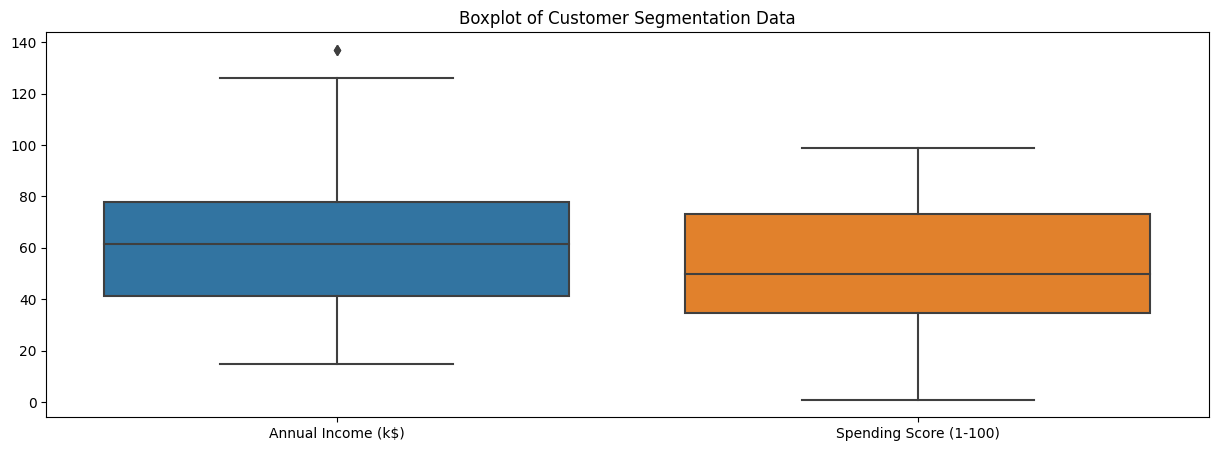

In [5]:
plt.figure(figsize=(15, 5))
plt.title('Boxplot of Customer Segmentation Data')
sns.boxplot(data = data)  
plt.show()

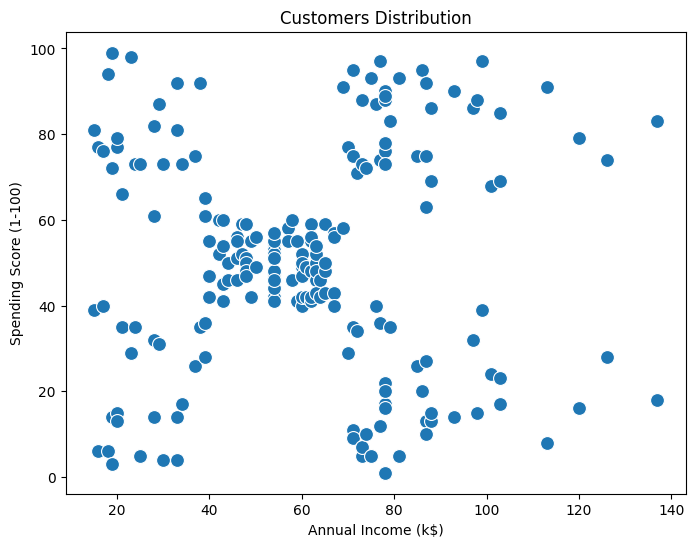

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, s=100)
plt.title("Customers Distribution")
plt.show()

## Step 3 Data Preprocessing

- Selected the relevant columns for clustering.
- Scaled the features using **StandardScaler** to normalize the data.

In [7]:
data.replace([np.inf, -np.inf], np.nan)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [8]:
data.dropna()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [9]:
X = data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled[:5])  

[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


## 🔧 Step 4: Determine the Optimal Number of Clusters ¶

To find the **best number of clusters (k)**, we use two evaluation methods:

1. **Elbow Method (Inertia)**: Measures the sum of squared distances of samples to their closest cluster center.  
   - We look for the "elbow point" where adding more clusters does not significantly reduce inertia.

2. **Silhouette Score**: Measures how similar a sample is to its own cluster compared to other clusters.  
   - Higher scores indicate better-defined clusters.

We will try multiple values of `k` and compute both **inertia** and **silhouette scores** to decide the optimal number of clusters.


In [10]:
inertia = []
silhouette_scores = []
K = [3 , 5 , 7, 9, 11]

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    

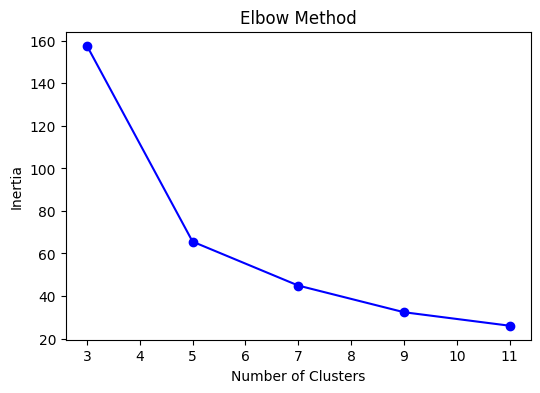

In [11]:
plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'o-', color='blue')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


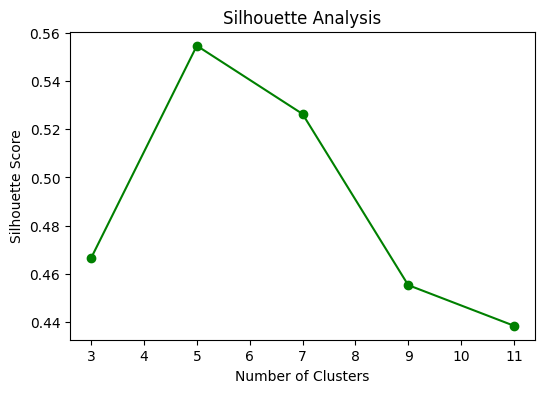

In [12]:
plt.figure(figsize=(6,4))
plt.plot(K, silhouette_scores, 'o-', color='green')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()

## 📌 Step 5: Apply K-Means and Visualize Clusters ¶

After determining the **optimal number of clusters (best_k)**, we can apply **K-Means clustering** to assign each customer to a cluster.  

Once the clustering is complete, we will use a **2D scatter plot** to visualize the customer segments based on **Annual Income** and **Spending Score**.  

This visualization helps us understand the **distinct groups** of customers and their spending behavior at a glance.


In [13]:
best_k = 5   # Based on the plots
print("The best # of clusters:", best_k)

The best # of clusters: 5


In [14]:
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
Data['Cluster'] = kmeans.fit_predict(X_scaled)

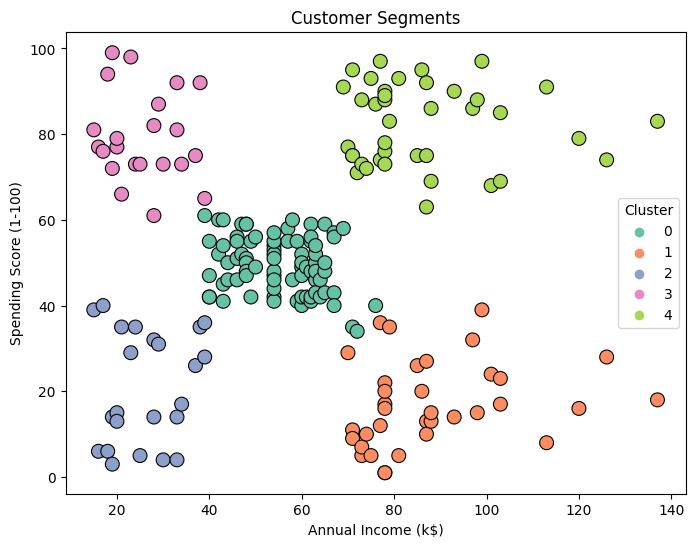

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', palette='Set2', data=Data, s=100, edgecolor='black')
plt.title("Customer Segments")
plt.show()

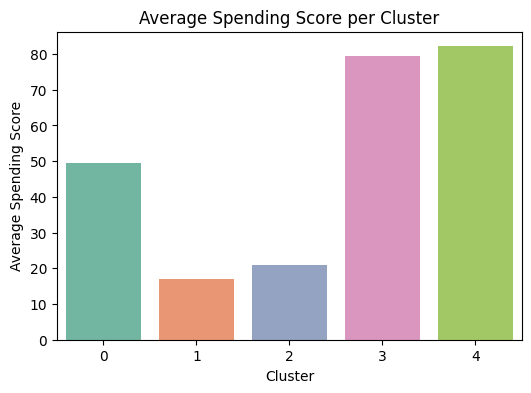

In [16]:
avg_spending = Data.groupby('Cluster')['Spending Score (1-100)'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x='Cluster', y='Spending Score (1-100)', data=avg_spending, palette='Set2')
plt.title("Average Spending Score per Cluster")
plt.ylabel("Average Spending Score")
plt.xlabel("Cluster")
plt.show()

## 📈 Step 6: Check Cluster Quality ¶

We use the **Silhouette Score** to see how well the clusters are formed.  
Higher scores mean the clusters are **better separated**.  

Let's print the **highest Silhouette Score** to check the best clustering.


In [17]:
print('The Silhouette Score = ' , max(silhouette_scores))

The Silhouette Score =  0.5546571631111091


### 💾  Save Cluster Predictions 

In [18]:
Data.to_csv("Mall_Customers_Clustered.csv", index=False)

print("Predictions saved successfully!")

Predictions saved successfully!
